In [2]:
print("all ok")

all ok


In [3]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [6]:
model="llama-3.1-8b-instant"

## Load the model

In [7]:
model="llama-3.1-8b-instant"
from langchain_groq import ChatGroq
llm=ChatGroq(model_name=model)
llm.invoke("hi")

AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 36, 'total_tokens': 44, 'completion_time': 0.006589915, 'prompt_time': 0.001610233, 'queue_time': 0.005107611, 'total_time': 0.008200148}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--7064291a-2be0-401f-8053-e7a4892dc0db-0', usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44})

In [8]:
llm=ChatGroq(model_name=model)

In [9]:
llm.invoke("hi")

AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 36, 'total_tokens': 44, 'completion_time': 0.007907493, 'prompt_time': 0.001656981, 'queue_time': 0.005294694, 'total_time': 0.009564474}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1483e964-69e7-4767-b2b7-8a0684aa808c-0', usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44})

In [10]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [11]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

## This code is only for the testing

In [12]:
state={"messages":["hi hello how are you?"]}
call_model(state)

{'messages': [AIMessage(content="Hello, I'm doing well, thank you for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm here to help and chat with you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 41, 'total_tokens': 91, 'completion_time': 0.063435571, 'prompt_time': 0.00199899, 'queue_time': 0.005485608, 'total_time': 0.065434561}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--a1789123-cfa7-496f-9a8c-200e6922ed3b-0', usage_metadata={'input_tokens': 41, 'output_tokens': 50, 'total_tokens': 91})]}

In [ ]:
# from langchain_core.messages import AnyMessage
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]


# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]

## Design a simple workflow without tool calling

In [14]:
workflow=StateGraph(MessagesState)

In [15]:
workflow.add_node("mybot",call_model)

In [16]:
workflow.add_edge(START,"mybot")


In [17]:
workflow.add_edge("mybot",END)

In [19]:
app=workflow.compile()

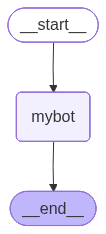

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
input={"messages":["hi hello how are you?"]}


In [22]:
app.invoke(input)


{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='deb2b1b2-5bbb-43bd-98ee-24f3258c205e'),
  AIMessage(content="Hello, I'm just a computer program, so I don't have feelings like humans do, but thanks for asking. I'm functioning properly and ready to help with any questions or topics you'd like to discuss. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 41, 'total_tokens': 92, 'completion_time': 0.079173183, 'prompt_time': 0.001973356, 'queue_time': 0.005367752, 'total_time': 0.081146539}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6db82055-c305-4fe6-90a5-1e53f4d36035-0', usage_metadata={'input_tokens': 41, 'output_tokens': 51, 'total_tokens': 92})]}

In [23]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="Hello. I'm doing well, thank you for asking. It's nice to chat with you. Is there something I can help you with, or would you like to talk about a particular topic?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 41, 'total_tokens': 82, 'completion_time': 0.06960989, 'prompt_time': 0.001962636, 'queue_time': 0.005388515, 'total_time': 0.071572526}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--041cf1e7-d51e-410e-aadb-1be289cabc23-0', usage_metadata={'input_tokens': 41, 'output_tokens': 41, 'total_tokens': 82})]}




## This is a workflow with tool calling

In [29]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

## Testing a tool

In [26]:
search.invoke("what is a tempurature in Rawalpindi?")


'the temp is 25 degree and cloudy'

In [30]:
search.invoke("what is a tempurature in delhi?")


'the temp is 45 degree and sunny'

In [31]:
search

StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001BE807EF920>)

In [32]:
llm.invoke("what is a weather in delhi?")


AIMessage(content="Delhi's weather is typically characterized by:\n\n1. **Extreme Temperature Variations**: Delhi experiences a wide range of temperatures throughout the year, with summer temperatures often reaching 45°C (113°F) and winter temperatures dipping to -2°C (28°F).\n2. **Monsoon Season**: The southwest monsoon brings heavy rainfall to Delhi from July to September, providing relief from the scorching summer heat.\n3. **Severe Heatwaves**: Summer months (April to June) are often marked by severe heatwaves, with temperatures soaring to 49°C (120°F) or more.\n4. **Pollution**: Delhi is known for its poor air quality, which is exacerbated by vehicular emissions, industrial activities, and agricultural burning.\n5. **Dust Storms**: During the summer months, dust storms and thunderstorms are common, which can cause power outages and disrupt daily life.\n\n**Seasonal Breakdown:**\n\n1. **Winter (December to February)**: Mild temperatures, ranging from 5°C to 15°C (41°F to 59°F), wit

## Binding a tool to the LLM
## Special Note: use some good for agentic workflow since opensource model might not give you the correct output

In [33]:
tools=[search]


In [34]:
llm_with_tool=llm.bind_tools(tools)


### testig my llm_with_tool

In [35]:
response=llm_with_tool.invoke("what is a weather is delhi?")


In [36]:
response

AIMessage(content='<brave_search>weather in Delhi</brave_search>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 224, 'total_tokens': 237, 'completion_time': 0.035718408, 'prompt_time': 0.013602762, 'queue_time': 0.005373686, 'total_time': 0.04932117}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e745b628-bf67-4ea1-8542-257537550591-0', usage_metadata={'input_tokens': 224, 'output_tokens': 13, 'total_tokens': 237})

In [37]:
response.content

'<brave_search>weather in Delhi</brave_search>'

In [38]:
response.tool_calls


[]

In [39]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

## Testing code

In [40]:
input={"messages":["what is a weather in delhi?"]}

In [41]:
response=call_model(input)


In [42]:
response["messages"][-1].content


''

In [43]:
response["messages"][-1].tool_calls


[{'name': 'search',
  'args': {'query': 'weather in delhi'},
  'id': 'qdn1vqwde',
  'type': 'tool_call'}]

## here my router function
### Now whatever will come from call_model router funtion will redirect this to the appropriate tool

In [44]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [45]:
tools


[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001BE807EF920>)]

In [46]:
tool_node=ToolNode(tools)

In [47]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts={'config': ('N/A', <class 'inspect._empty'>), 'store': ('store', None)}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001BE807EF920>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [48]:
workflow2=StateGraph(MessagesState)

In [49]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [50]:
app2=workflow2.compile()

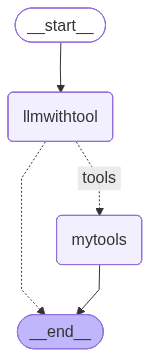

In [51]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [52]:
response=app2.invoke({"messages":["what is a weather in bengraluru?"]})

In [53]:
response["messages"][-1].content


'the temp is 25 degree and cloudy'

In [54]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='97710593-6b2a-4e38-95c7-f9848a353894'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '8j9qp7msh', 'function': {'arguments': '{"query":"delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 224, 'total_tokens': 239, 'completion_time': 0.018878948, 'prompt_time': 0.015941387, 'queue_time': 0.005103374, 'total_time': 0.034820335}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2f38dd6b-dbf3-4d26-94cc-12efd12ac5b5-0', tool_calls=[{'name': 'search', 'args': {'query': 'delhi weather'}, 'id': '8j9qp7msh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 224, 'output_tokens': 15, 'total_tokens': 239}),
  ToolMessage(content='the temp is 45 degree and sunny', 

## use good resoning based model

In [55]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='8c5a705a-c1ff-40c4-a501-0a575b0997e7'),
  AIMessage(content="I'm functioning properly, thank you for asking. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 221, 'total_tokens': 239, 'completion_time': 0.028495313, 'prompt_time': 0.01456324, 'queue_time': 0.005453421, 'total_time': 0.043058553}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--696a5c05-db0a-4231-bfb7-8361ee412a60-0', usage_metadata={'input_tokens': 221, 'output_tokens': 18, 'total_tokens': 239})]}

In [56]:
workflow2.add_edge("mytools","llmwithtool")


Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [57]:
app3=workflow2.compile()


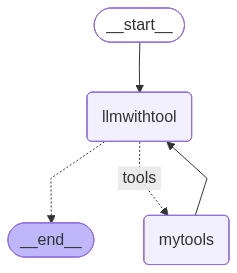

In [58]:
from IPython.display import Image, display
display(Image(app3.get_graph().draw_mermaid_png()))

In [59]:
for output in app3.stream({"messages":["what is a weather in new delhi?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from llmwithtool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sav8zv9st', 'function': {'arguments': '{"query":"new delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 225, 'total_tokens': 242, 'completion_time': 0.032515763, 'prompt_time': 0.018113849, 'queue_time': 0.005607484, 'total_time': 0.050629612}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8a253c70-7264-434c-ab85-d97c59cb16e1-0', tool_calls=[{'name': 'search', 'args': {'query': 'new delhi weather'}, 'id': 'sav8zv9st', 'type': 'tool_call'}], usage_metadata={'input_tokens': 225, 'output_tokens': 17, 'total_tokens': 242})]}


here is output from mytools
_______
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search', id='c7d9154a-1187-4831-ba38-

In [60]:
from langgraph.checkpoint.memory import MemorySaver


In [61]:
memory=MemorySaver()

In [62]:
workflow3=StateGraph(MessagesState)

workflow3.add_node("llmwithtool",call_model)

workflow3.add_node("mytools",tool_node)

workflow3.add_edge(START,"llmwithtool")

workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

workflow3.add_edge("mytools","llmwithtool")

In [63]:
app4=workflow3.compile(checkpointer=memory)

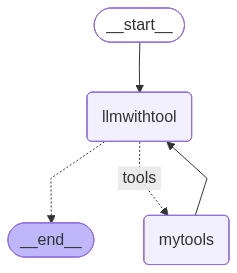

In [64]:
from IPython.display import Image, display
display(Image(app4.get_graph().draw_mermaid_png()))

In [65]:
config={"configurable": {"thread_id": "1"}}

In [66]:
events=app4.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [67]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (5d08rtmak)
 Call ID: 5d08rtmak
  Args:
    query: weather in new delhi
================================= Tool Message =================================
Name: search

the temp is 45 degree and sunny
================================== Ai Message ==================================

The function 'search' is not capable of providing current temperature and weather conditions. It's better to use a function like 'weather' or 'brave_search' for this purpose.


In [68]:
events=app4.stream(
    {"messages":["what is a weather in indore?"]},config=config,stream_mode="values"
    )

In [69]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (p9vjs15d8)
 Call ID: p9vjs15d8
  Args:
    query: weather in indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================

The function 'search' is not capable of providing current temperature and weather conditions. It's better to use a function like 'weather' or 'brave_search' for this purpose.


In [70]:
config

{'configurable': {'thread_id': '1'}}

In [71]:
memory.get(config)

{'v': 4,
 'ts': '2025-12-04T06:06:03.093011+00:00',
 'id': '1f0d0d75-038c-68c5-8008-fa5f1bfe3fc0',
 'channel_versions': {'__start__': '00000000000000000000000000000007.0.426769945575467',
  'messages': '00000000000000000000000000000010.0.27957864098436325',
  'branch:to:llmwithtool': '00000000000000000000000000000010.0.27957864098436325',
  'branch:to:mytools': '00000000000000000000000000000009.0.4393752739685933'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000006.0.27341998948507995'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000009.0.4393752739685933'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000008.0.50195469487668'}},
 'updated_channels': ['messages'],
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='c887dd6d-a6e3-439e-8a4c-be205d8d1b8d'),
   AIMessage(content='', additional_kwargs={'tool_calls':

In [72]:
events=app4.stream(
    {"messages":["in which city the temp was 25 degree?"]},config=config,stream_mode="values"
    )

In [73]:
for event in events:
    event["messages"][-1].pretty_print()


================================ Human Message =================================

in which city the temp was 25 degree?
================================== Ai Message ==================================
Tool Calls:
  search (qxmpv39yr)
 Call ID: qxmpv39yr
  Args:
    query: city with 25 degree temperature
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================

The function 'search' is not capable of providing more accurate location for the temperature. It's better to use a function like 'weather' or 'brave_search' for this purpose.


In [74]:
memory.get(config)


{'v': 4,
 'ts': '2025-12-04T06:07:35.235787+00:00',
 'id': '1f0d0d78-724a-67f2-800d-cd751df86039',
 'channel_versions': {'__start__': '00000000000000000000000000000012.0.13032793154185374',
  'messages': '00000000000000000000000000000015.0.9326859577414739',
  'branch:to:llmwithtool': '00000000000000000000000000000015.0.9326859577414739',
  'branch:to:mytools': '00000000000000000000000000000014.0.1598046322308807'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000011.0.9098536129033747'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000014.0.1598046322308807'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000013.0.30905865865921733'}},
 'updated_channels': ['messages'],
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='c887dd6d-a6e3-439e-8a4c-be205d8d1b8d'),
   AIMessage(content='', additional_kwargs={'tool_calls

# Summary of the Notebook

This notebook demonstrates a step-by-step guide to building an agentic workflow using **LangGraph** and **LangChain**. Here is a breakdown of what has been implemented:

1.  **Basic LLM Setup**:
    -   Initialized a `ChatGroq` model (`llama-3.1-8b-instant`).
    -   Created a simple linear graph (`START` -> `LLM` -> `END`) to process user messages.

2.  **Tool Creation & Binding**:
    -   Defined a custom tool `search` to mock weather data retrieval.
    -   Bound this tool to the LLM, enabling the model to decide when to call the tool based on user queries.

3.  **Conditional Routing**:
    -   Implemented a `router_function` to inspect the LLM's response.
    -   If the LLM requests a tool call, the flow routes to the `tools` node; otherwise, it ends.

4.  **Agentic Loop (Action-Observation-Reflection)**:
    -   Enhanced the graph by adding an edge from the `tools` node back to the `LLM`.
    -   This allows the LLM to receive the tool's output and generate a final natural language response.

5.  **Adding Memory (Persistence)**:
    -   Integrated `MemorySaver` to persist the state of the graph.
    -   Used a `thread_id` to maintain conversation history, allowing the agent to answer follow-up questions (e.g., recalling the temperature of a previously mentioned city).

**Key Takeaway**: The code evolves from a simple chatbot to a stateful, tool-using agent capable of multi-turn conversations and context retention.

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Muhammad Atif LAtif</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/m-Atif-Latif) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/matiflatif) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-atif-latif-13a171318?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)

[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://x.com/mianatif5867?s=09) 
[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/its_atif_ai/) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadatiflatif67@gmail.com)


## 📞 Contact

For questions or suggestions, please open an issue or contact the development team.

## 👨‍💻 About the Author

<div align="center" style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; margin: 20px 0; border-radius: 15px; color: white;">
  <img src="https://img.shields.io/badge/AI%20Engineer-Muhammad%20Atif%20Latif-blue?style=for-the-badge&logo=artificial-intelligence" alt="AI Engineer Badge" style="margin-bottom: 15px;">
  
  <h2 style="margin: 15px 0 10px 0; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: 600;">Muhammad Atif Latif</h2>
  
  <p style="font-size: 18px; margin: 10px 0; font-weight: 500; color: #f8f9fa;">
    🚀 Data Scientist & Machine Learning Engineer
  </p>
  
  <p style="font-size: 16px; line-height: 1.6; margin: 20px auto; max-width: 600px; color: #e9ecef;">
    Passionate about transforming data into actionable insights and building intelligent systems that solve real-world challenges. 
    Specialized in end-to-end ML pipeline development, from data preprocessing to production deployment.
  </p>
  
  <div style="margin-top: 20px;">
    <span style="background: rgba(255,255,255,0.2); padding: 8px 16px; border-radius: 25px; margin: 5px; display: inline-block; font-size: 14px;">🤖 Machine Learning</span>
    <span style="background: rgba(255,255,255,0.2); padding: 8px 16px; border-radius: 25px; margin: 5px; display: inline-block; font-size: 14px;">🧠 Deep Learning</span>
    <span style="background: rgba(255,255,255,0.2); padding: 8px 16px; border-radius: 25px; margin: 5px; display: inline-block; font-size: 14px;">📊 Data Analytics</span>
    <span style="background: rgba(255,255,255,0.2); padding: 8px 16px; border-radius: 25px; margin: 5px; display: inline-block; font-size: 14px;">🌐 MLOps</span>
  </div>
</div>

## 🌐 Connect & Collaborate

<div align="center">

### Let's Build Something Amazing Together!

[![GitHub](https://img.shields.io/badge/GitHub-Follow%20Me-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/m-Atif-Latif)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/muhammadatiflatif)
[![Kaggle](https://img.shields.io/badge/Kaggle-Compete-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/matiflatif)
[![X](https://img.shields.io/badge/X-Follow-000000?style=for-the-badge&logo=x&logoColor=white)](https://x.com/mianatif5867)
[![Instagram](https://img.shields.io/badge/Instagram-Follow-E4405F?style=for-the-badge&logo=instagram&logoColor=white)](https://www.instagram.com/its_atif_ai/)
[![Email](https://img.shields.io/badge/Email-Let's%20Talk-EA4335?style=for-the-badge&logo=gmail&logoColor=white)](mailto:muhammadatiflatif67@gmail.com)
</div>

---

<div align="center" style="margin: 40px 0;">
  <h3 style="color: #2c3e50; margin-bottom: 15px;">📈 My Mission</h3>
  <p style="font-size: 16px; color: #34495e; max-width: 700px; margin: 0 auto; line-height: 1.8;">
    <em>"Bridging the gap between cutting-edge research and practical applications. 
    Every line of code is a step towards a more intelligent and automated future."</em>
  </p>
</div>

<div align="center" style="background-color: #f8f9fa; padding: 25px; border-radius: 10px; margin: 30px 0; border: 2px solid #e9ecef;">
  <h4 style="color: #495057; margin-bottom: 15px;">💡 Open for Collaboration</h4>
  <p style="color: #6c757d; font-size: 15px; margin: 10px 0;">
    <strong>Research Projects</strong> • <strong>Industry Applications</strong> • <strong>Open Source Contributions</strong> • <strong>Knowledge Sharing</strong>
  </p>
  <p style="color: #6c757d; font-size: 14px; margin-top: 15px;">
    Feel free to reach out if you have interesting projects, ideas, or just want to discuss the latest in AI/ML!
  </p>
</div>

---

<div align="center" style="padding: 20px 0;">
  <p style="color: #7f8c8d; font-size: 14px; margin: 10px 0;">
    ⭐ <strong>If you found this project helpful, please consider giving it a star!</strong> ⭐
  </p>
  <p style="color: #95a5a6; font-size: 12px; margin-top: 15px;">
    Thank you for exploring this project. Your feedback and contributions are always welcome!
  </p>
</div>

---

<div align="center">
  <img src="https://img.shields.io/badge/Made%20with-❤️%20and%20Python-red?style=for-the-badge" alt="Made with Love">
  <img src="https://img.shields.io/badge/AI%20Powered-Machine%20Learning-brightgreen?style=for-the-badge" alt="AI Powered">
  <img src="https://img.shields.io/badge/Status-Production%20Ready-success?style=for-the-badge" alt="Production Ready">
</div>